# Shrey Viradiya
# 18BCE259

**Simple and Multiple Linear Regression using Gradient
Descent & Normal Equation Method (without using
sklearn or equivalent library for both)**

### Gradient Descent

In [ ]:
import numpy as np
import sklearn.datasets as skd
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
X, y = skd.load_boston(return_X_y=True)
X = scale(X)
X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
X_new[:,0] = np.ones(shape = (1,X.shape[0]))
X_new[:,1:] = X
X = X_new

In [ ]:
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

In [ ]:
# epochs
n_iter = 1000

# Learning Rate
LR = 0.03

In [ ]:
a , b = X_train.shape
thetas = np.random.uniform(0,1, size = (b))

In [ ]:
thetas

array([0.26318079, 0.9720099 , 0.31670281, 0.75792955, 0.74096632,
       0.82558725, 0.05036764, 0.69818082, 0.90993727, 0.47909236,
       0.74514468, 0.24588617, 0.09977386, 0.94071498])

In [ ]:
mse_history = []

In [ ]:
for i in range(n_iter):
    update = np.zeros(shape=(b))
    y_predicted = np.dot(X_train, thetas)
    error = y_predicted - y_train
    for f in range(b):
        update[f] = np.sum(error * ((X_train.T)[f]))
    thetas = thetas - (LR/a) * update
    mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))

In [ ]:
thetas

array([23.20612277, -1.52903751,  0.98270485,  0.20303559,  0.47485383,
       -1.62007871,  3.43719136,  0.04383981, -2.73135757,  3.43319608,
       -1.89985195, -1.70823575,  0.10204131, -3.71664314])

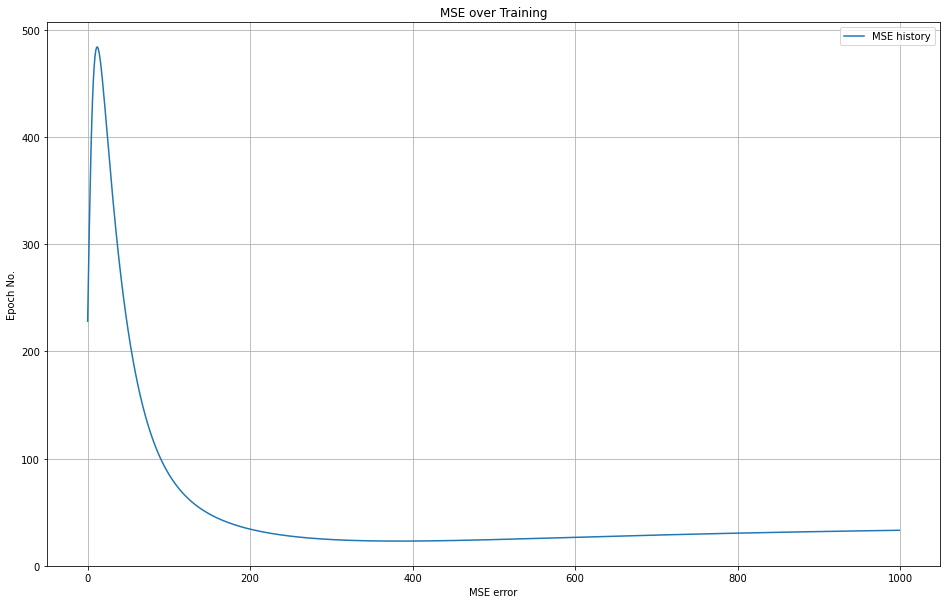

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.xlabel('MSE error')
plt.ylabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
y_tp = np.dot(X_test, thetas)

In [ ]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

4.799898997293879

In [ ]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

33.12770456530223

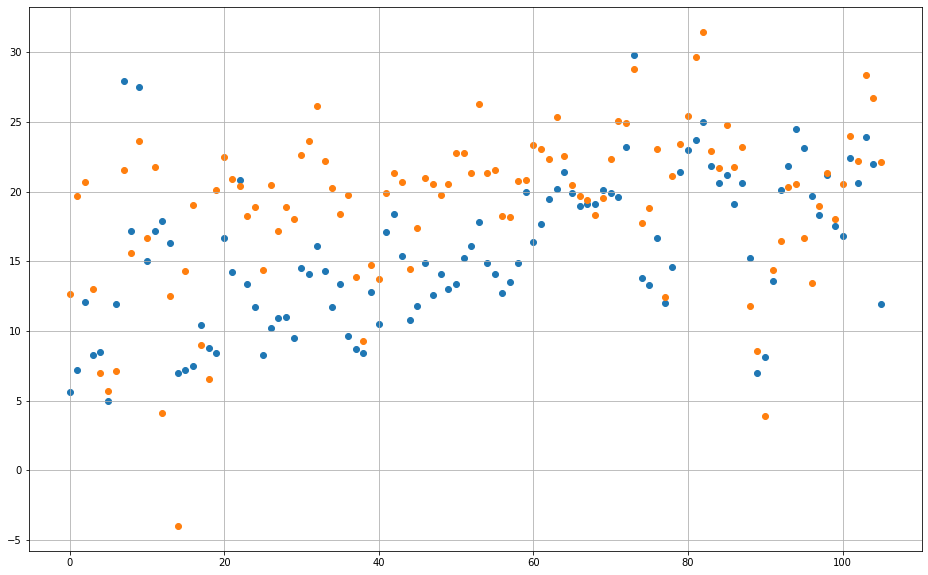

In [ ]:
plt.figure(figsize = (16,10))
plt.scatter(y = y_test, x = range(len(y_test)))
plt.scatter(y = y_tp, x = range(len(y_test)))
plt.grid(True)
plt.show()

### Normal Equation

In [ ]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [ ]:
theta_best

array([23.28337581, -1.643388  ,  1.0305089 ,  0.37845963,  0.43550243,
       -1.73595149,  3.43080791,  0.07337369, -2.7237948 ,  4.21699484,
       -2.59301797, -1.74926608, -0.1178641 , -3.69508319])

In [ ]:
y_tp = np.dot(X_test, theta_best)

In [ ]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

5.142232214465217

In [ ]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

37.89377859960078

### Using sklearn (for reference only)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X, y = skd.load_boston(return_X_y=True)
X_train = X[:400,:]
y_train = y[:400]
X_test = X[400:,:]
y_test = y[400:]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

28.6725995908559

In [ ]:
model.coef_

array([-1.91246374e-01,  4.42289967e-02,  5.52207977e-02,  1.71631351e+00,
       -1.49957220e+01,  4.88773025e+00,  2.60921031e-03, -1.29480799e+00,
        4.84787214e-01, -1.54006673e-02, -8.08795026e-01, -1.29230427e-03,
       -5.17953791e-01])

In [ ]:
thetas

array([23.20612277, -1.52903751,  0.98270485,  0.20303559,  0.47485383,
       -1.62007871,  3.43719136,  0.04383981, -2.73135757,  3.43319608,
       -1.89985195, -1.70823575,  0.10204131, -3.71664314])

In [ ]:
y_tp = model.predict(X_test)

In [ ]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

5.142232214465271

In [ ]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

37.893778599601866

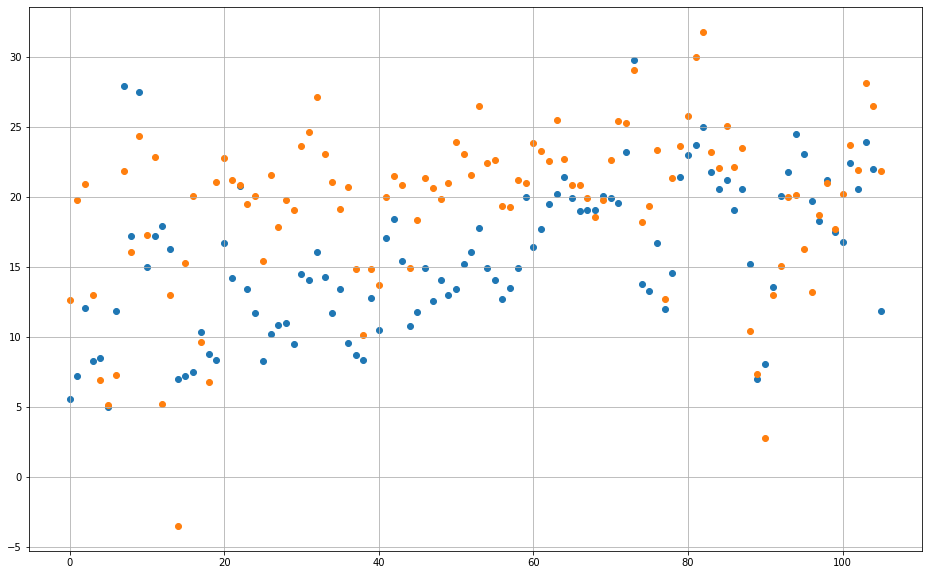

In [ ]:
plt.figure(figsize = (16,10))
plt.scatter(y = y_test, x = range(len(y_test)))
plt.scatter(y = y_tp, x = range(len(y_test)))
plt.grid(True)
plt.show()